In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from time import time

%matplotlib inline

In [2]:
file = pd.ExcelFile('dataPoints.xlsx')
df = file.parse('Foglio1')
df.head()

X = df[['x1', 'x2']].to_numpy()
y_true = df[['y']].to_numpy().reshape(1,-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_true.reshape(-1,1), test_size=0.15, 
                                                    random_state=1869097)

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

In [3]:
def g_fun(T, sigma):
    num = np.exp(2*sigma*T) - 1
    den = np.exp(2*sigma*T) + 1
    return num / den

def fun_EL(X, v):
    
    # creating matrix X1 (X matrix plus array of ones)
    X1 = np.append(X, -1* np.ones((X.shape[0], 1)), axis=1)
    
    return np.dot(v, g_fun(np.dot(Wb, np.transpose(X1)), sigma))

def fun_grad_EL(v, X_train, y_true):
    
    # creating matrix X1 (X matrix plus array of ones)
    X1 = np.append(X_train, -1* np.ones((X_train.shape[0],1)), axis=1)

    # pick parameters from omega one
    v = v.reshape(N,1)
    omega = v.reshape(1,N)
        
    ### compute partial derivatives in a "pythonic" way:
    
    # for the sake of clearness, let's define some variables
    # (MATRIX1) dot product between Wb and X1
    T = np.dot(Wb, np.transpose(X1)) # NxX_train.shape[0] matrix
    
    # derivative of g()
    #g_der = 4 * sigma * np.exp(2 * sigma * T) / (np.exp(2 * sigma * T) + 1)**2

    dE_dv = 1 / X_train.shape[0] * np.dot(g_fun(T, sigma), np.transpose(fun_EL(X_train, omega) - y_true)) + 2 * rho * v

    return dE_dv.reshape(-1)

def loss(v, X, y_true):
    y_pred = fun_EL(X, v)
    l = np.sum((y_pred - y_true)**2)/(2 * X.shape[0]) + rho * np.linalg.norm(v)**2
    loss_history.append(l)
    return l

In [4]:
N = 30
n = np.shape(X)[1]
sigma = 1.8
rho = 0.00001

H = 10
min_list = []
loss_history = []

for h in range(H):

    W = np.random.randn(N,n)
    b = np.random.randn(N,1)
    v = np.random.randn(N)

    # merge W with b
    Wb = np.append(W, b, axis=1)

    res = minimize(loss, v, jac = fun_grad_EL, args=(X_train, y_train), method = "BFGS")#, options = {"maxiter": 100, "gtol":1e-2})
    min_list.append([res.fun, W, b])

In [5]:
min_list.sort(key = lambda x: x[0])
[x[0] for x in min_list]

[0.03916749556441452,
 0.03975214093262985,
 0.046367326883468375,
 0.04649952943841935,
 0.04656804789772529,
 0.05123035034186777,
 0.05154852565276894,
 0.05867212881330519,
 0.06354650597545428,
 0.089878761917536]

In [6]:
W = min_list[0][1]#np.random.randn(N,n)
b = min_list[0][2]#np.random.randn(N,1)
v = np.random.randn(N)

loss_history = []
t1 = time()
res = minimize(loss, v, args=(X_train, y_train), method = "BFGS")#, options = {"maxiter": 100, "gtol":1e-2})
t1 = time()-t1

In [7]:
print(res.message)
print('fun:', res.fun)
print('success:',res.success)
print('nfev:', res.nfev)
print('nit:', res.nit)
print('njev:', res.njev)

Optimization terminated successfully.
fun: 0.039752383708795504
success: True
nfev: 7200
nit: 223
njev: 225


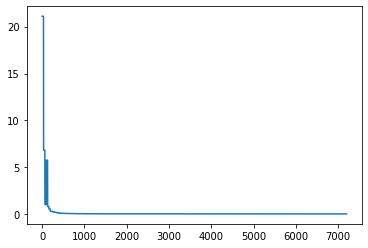

In [8]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [9]:
# losses
print(loss(res.x, X_train, y_train))
print(loss(res.x, X_test, y_test))

0.039752383708795504
0.05875444322967609


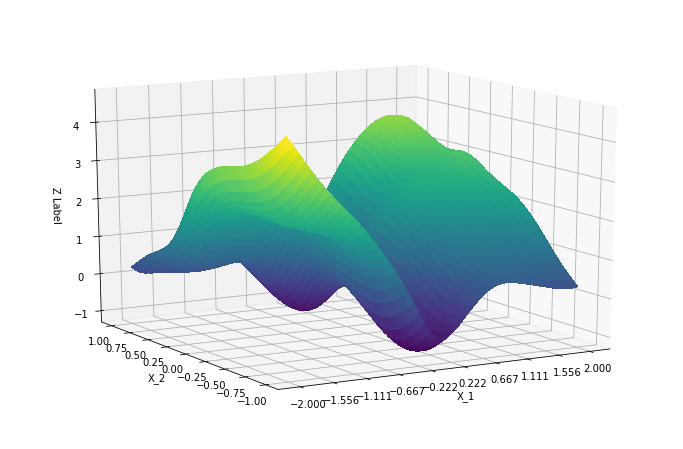

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

X_1 = np.linspace(-2,2,500)
X_2 = np.linspace(-1,1,500)
X_1, X_2 = np.meshgrid(X_1, X_2)
zs = np.array([fun_EL(np.array([x,y]).reshape(1,2), res.x) for x,y in zip(np.ravel(X_1), np.ravel(X_2))])
Z = zs.reshape(X_1.shape)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X_1, X_2, Z ,linewidth=0,cmap=cm.viridis, antialiased=False)
ax.set_xticks((np.linspace(-2,2,10)))
ax.view_init(elev=15, azim=240)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Z Label')
plt.savefig('graph_question_1_1.png',dpi=600)
plt.show()

# see if it's our function is convex: only 1 Neuron (v 1-dim)

In [11]:
X = df[['x1', 'x2']].to_numpy()
y_true = df[['y']].to_numpy().reshape(1,-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_true.reshape(-1,1), test_size=0.15, 
                                                    random_state=1869097)

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

N = 1
n = np.shape(X)[1]
sigma = 1.8
rho = 0.00001

W = np.random.randn(N,n)
b = np.random.randn(N,1)
v = np.random.randn(N)

# merge W with b
Wb = np.append(W, b, axis=1)

def g_fun(T, sigma):
    num = np.exp(2*sigma*T) - 1
    den = np.exp(2*sigma*T) + 1
    return num / den

def fun_EL(X, v):
    
    # creating matrix X1 (X matrix plus array of ones)
    X1 = np.append(X, -1* np.ones((X.shape[0], 1)), axis=1)
    
    return np.dot(v, g_fun(np.dot(Wb, np.transpose(X1)), sigma))

def loss(v, X, y_true):
    y_pred = fun_EL(X, v)
    l = np.sum((y_pred - y_true)**2)/(2 * X.shape[0]) + rho * np.linalg.norm(v)**2
    loss_history.append(l)
    return l

In [12]:
v_grid = np.linspace(-10, 10, 9000)

In [13]:
loss_grid = [loss(v, X, y_true) for v in v_grid] 

In [14]:
import matplotlib.pyplot as plt

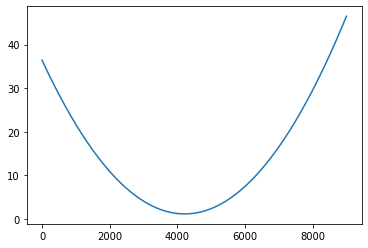

In [15]:
plt.plot(loss_grid)

In [16]:
min(loss_grid)

1.1549226162501804

In [17]:
loss_history = []
t1 = time()
res = minimize(loss, v, jac = fun_grad_EL, args=(X_train, y_train), method = "CG",
               options = {"maxiter": 10, "gtol":1e-3})
t1 = time()-t1
print(t1)

0.002368927001953125


In [18]:
res

     fun: 1.2121047055583418
     jac: array([-0.00048449])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 4
    njev: 5
  status: 0
 success: True
       x: array([-0.63513533])

In [19]:
print(res.fun, 'vs', min(loss_grid))

1.2121047055583418 vs 1.1549226162501804
